These notebooks compare a base and scenario for Soundcast models. To run: from the menu bar above, choose **Cell -> Run All ** or run lines individually. Use the toggle button below to hide/show the raw Python code.

VMT, VHT, Delay, and Mode Share
----

### Define Inputs
-----

In [1]:
# Base run for comparison
base_run = r'R:\SoundCast\releases\TransportationFutures2010'

# Scenario names
base_name = '2010 Base'
scen_name = 'Scenario'

# Base Year for Validation data
base_yr = 2010

In [2]:
# Toggle to hide code
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
import os
import numpy as np
import pandas as pd
import h5py
import pylab as P
from IPython.display import display, display_pretty, Javascript, HTML
from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts
import matplotlib.pyplot as plt
plt.style.use('ggplot')



# Change working directory; only run this once since its a relative path change
default_path = r'../../..'
os.chdir(default_path)



# Show charts in notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


----

In [4]:
# Read network summary from latest run
net_sum_scen = pd.read_excel(r'outputs\network_summary_detailed.xlsx', 
                             sheetname ='Network Summary')
net_sum_base = pd.read_excel(base_run + r'\outputs\network_summary_detailed.xlsx',
                             sheetname='Network Summary')



# delete first empty row
try:
    net_sum_scen.drop('tod', axis=0, inplace=True)
    net_sum_base.drop('tod', axis=0, inplace=True)
except:
    print 'summaries imported'

summaries imported


# VMT

## VMT by TOD

In [5]:
pd.options.display.float_format = '{:,.0f}'.format

In [6]:
# Sort TOD in coherent order
tod = {
    'am': 0,
    'md': 1,
    'pm': 2,
    'ev': 3,
    'ni': 4
}

In [7]:
# compare scenarios
vmt_scen = net_sum_scen.groupby('TP_4k').sum()
vmt_base = net_sum_base.groupby('TP_4k').sum()

# Select only VMT columns
vmt_scen = vmt_scen[vmt_scen.columns[[i.endswith('_vmt') for i in vmt_scen.columns]]]
vmt_base = vmt_base[vmt_base.columns[[i.endswith('_vmt') for i in vmt_base.columns]]]

In [8]:
df = pd.DataFrame([vmt_scen.sum(axis=1),
              vmt_base.sum(axis=1)]).T
df.columns=[scen_name,base_name]

# sort columns
df['tod_index'] = ([tod[x] for x in df.index])
df.sort_values('tod_index',inplace=True)
df.drop('tod_index',axis=1,inplace=True)
df.loc['Total'] = df.sum(axis=0)
df

,Scenario,2010 Base
TP_4k,,
am,"12,025,908","12,025,908"
md,"28,064,371","28,064,371"
pm,"17,572,611","17,572,611"
ev,"8,884,616","8,884,616"
ni,"13,212,746","13,212,746"
Total,"79,760,252","79,760,252"


**Total VMT by TOD**

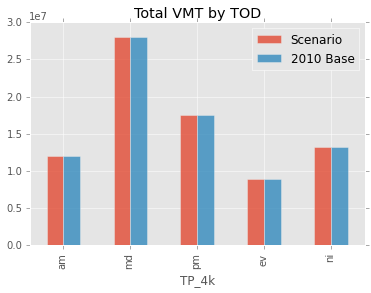

In [9]:
df.drop('Total',inplace=True)
df.plot(kind='bar', alpha=0.8,title='Total VMT by TOD')

** VMT Distribution by TOD**

In [10]:
pd.options.display.float_format = '{:.1f}%'.format 
df = df/df.sum()*100

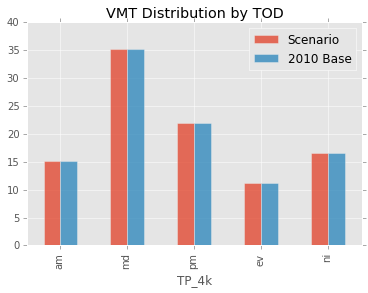

In [11]:
df.plot(kind='bar',alpha=0.8, title='VMT Distribution by TOD')

## VMT by Facility Type

In [12]:
pd.options.display.float_format = '{:,.0f}'.format

df = pd.DataFrame([vmt_scen.sum(axis=0),
              vmt_base.sum(axis=0)]).T
df.columns=[scen_name,base_name]
df.loc['Total'] = df.sum(axis=0)
# HTML(df.to_html(classes='right_aligned_df'))
df

,Scenario,2010 Base
arterial_vmt,"35,886,129","35,886,129"
connectors_vmt,"5,535,211","5,535,211"
highway_vmt,"38,338,912","38,338,912"
Total,"79,760,252","79,760,252"


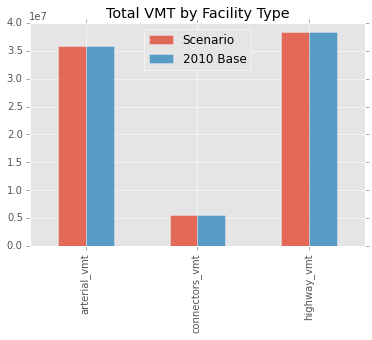

In [13]:
df.drop('Total',inplace=True)
df.plot(kind='bar',alpha=0.8,title='Total VMT by Facility Type')

** VMT Distribution by Facility Type**

In [14]:
pd.options.display.float_format = '{:.1f}%'.format 
df = df/df.sum()*100

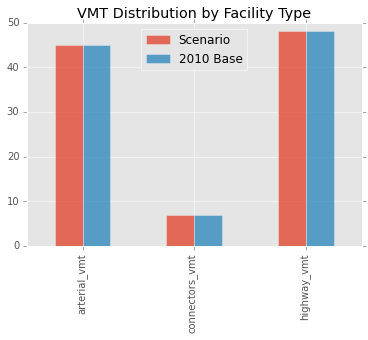

In [15]:
df.plot(kind='bar',alpha=0.8, title='VMT Distribution by Facility Type')

--------------

# Delay by TOD

In [16]:
# compare scenarios
vmt_scen = net_sum_scen.groupby('TP_4k').sum()
vmt_base = net_sum_base.groupby('TP_4k').sum()

# Select only VMT columns
vmt_scen = vmt_scen[vmt_scen.columns[[i.endswith('_delay') for i in vmt_scen.columns]]]
vmt_base = vmt_base[vmt_base.columns[[i.endswith('_delay') for i in vmt_base.columns]]]

In [17]:
# Sort TOD in coherent order
tod = {
    'am': 0,
    'md': 1,
    'pm': 2,
    'ev': 3,
    'ni': 4
}

In [18]:
pd.options.display.float_format = '{:,.0f}'.format

df = pd.DataFrame([vmt_scen.sum(axis=1),
              vmt_base.sum(axis=1)]).T
df.columns=[scen_name,base_name]

# sort columns
df['tod_index'] = ([tod[x] for x in df.index])
df.sort_values('tod_index',inplace=True)
df.drop('tod_index',axis=1,inplace=True)
df.loc['Total'] = df.sum(axis=0)
df

,Scenario,2010 Base
TP_4k,,
am,"72,648","72,648"
md,"164,023","164,023"
pm,"157,945","157,945"
ev,"59,289","59,289"
ni,"59,178","59,178"
Total,"513,084","513,084"


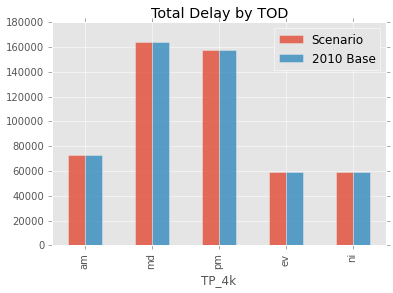

In [19]:
df.drop('Total',inplace=True)
df.plot(kind='bar', alpha=0.8,title='Total Delay by TOD')

**Delay Distribution by TOD**

In [20]:
pd.options.display.float_format = '{:.1f}%'.format 
df = df/df.sum()*100

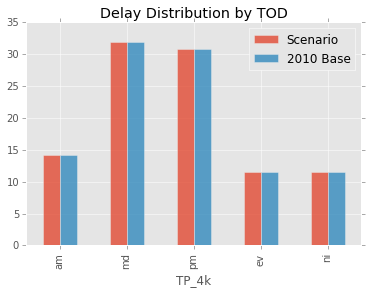

In [21]:
df.plot(kind='bar',alpha=0.8, title='Delay Distribution by TOD')

## Total Delay by Facility Type

In [22]:
pd.options.display.float_format = '{:,.0f}'.format

df = pd.DataFrame([vmt_scen.sum(axis=0),
              vmt_base.sum(axis=0)]).T
df.columns=[scen_name,base_name]
df.loc['Total'] = df.sum(axis=0)
df.drop('connectors_delay',inplace=True)
df

,Scenario,2010 Base
arterial_delay,"344,815","344,815"
highway_delay,"168,268","168,268"
Total,"513,084","513,084"


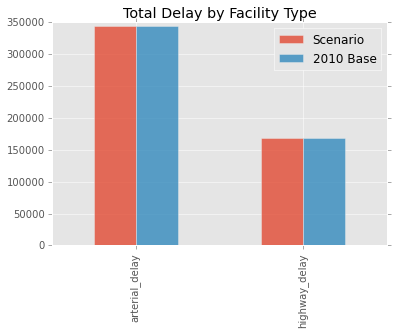

In [23]:
df.drop('Total',inplace=True)
df.plot(kind='bar',alpha=0.8,title='Total Delay by Facility Type')

**Delay Distribution by Facility Type**

In [24]:
pd.options.display.float_format = '{:.1f}%'.format 
df = df/df.sum()*100

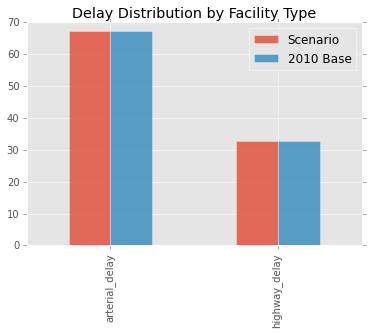

In [25]:
df.plot(kind='bar',alpha=0.8, title='Delay Distribution by Facility Type')

# Counts


In [26]:
def r_squared(actual, ideal):
    '''Calcualte R^2 between two data sets'''
    actual_mean = np.mean(actual)
    ideal_dev = np.sum([(val - actual_mean)**2 for val in ideal])
    actual_dev = np.sum([(val - actual_mean)**2 for val in actual])

    return ideal_dev / actual_dev

### Freeway Counts

In [27]:
net_sum_scen = pd.read_excel(r'outputs\network_summary_detailed.xlsx', 
                        sheetname ='TPTT Counts Output')

C:\Users\Brice\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


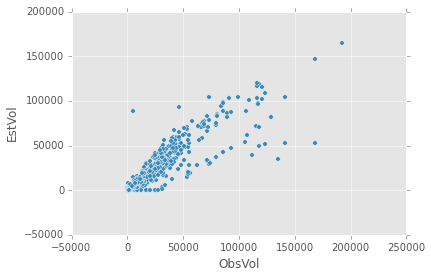

In [28]:
net_sum_scen[['ObsVol','EstVol']].plot(x='ObsVol', y='EstVol', kind='scatter')

### Arterial Counts

In [29]:
net_sum_scen = pd.read_excel(r'outputs\network_summary_detailed.xlsx', 
                        sheetname ='Arterial Counts Output')


                              R-squared: 0.66


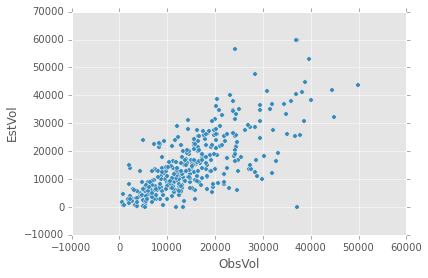

In [30]:
r_sq = r_squared(net_sum_scen['EstVol'],net_sum_scen['ObsVol'])
net_sum_scen[['ObsVol','EstVol']].plot(x='ObsVol', y='EstVol', kind='scatter')
print ""
print " "*30 + "R-squared: " + str(r_sq.round(2))

# Screenline Volumes

In [31]:
net_sum_scen = pd.read_excel(r'outputs\network_summary_detailed.xlsx', 
                        sheetname ='Screenline Volumes')

In [32]:
# Load screenline volumes
screenlines = pd.read_csv(r'scripts/summarize/inputs/screenlines.csv')

In [33]:
df = net_sum_scen.merge(screenlines,left_on='Screenline', right_on='id')
primary_df = df[df['type'] == 'primary']
primary_df = primary_df.groupby('name').sum()

secondary_df = df[df['type'] == 'secondary']
secondary_df = secondary_df.groupby('name').sum()

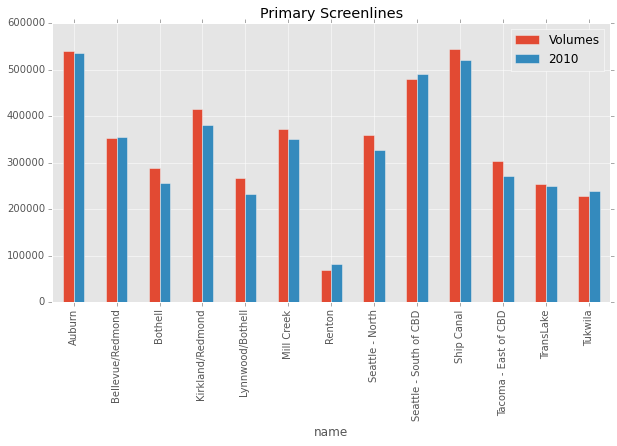

In [34]:
ax = primary_df[['Volumes',str(base_yr)]].plot(kind='bar', figsize=(10,5), title='Primary Screenlines')

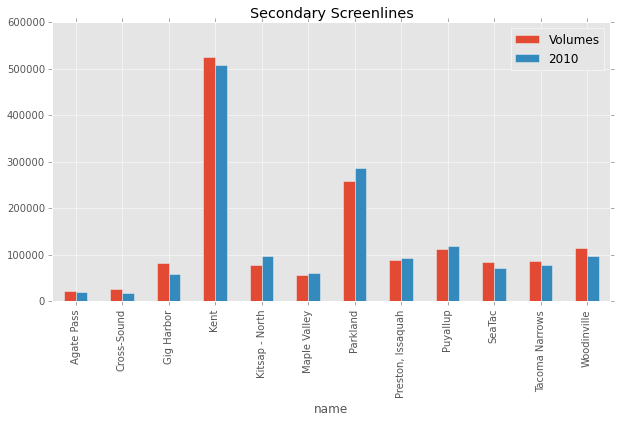

In [35]:
ax = secondary_df[['Volumes',str(base_yr)]].plot(kind='bar', figsize=(10,5), 
                                                          title='Secondary Screenlines')

In [36]:
df = df.groupby('name').sum()


                              R-squared: 0.95


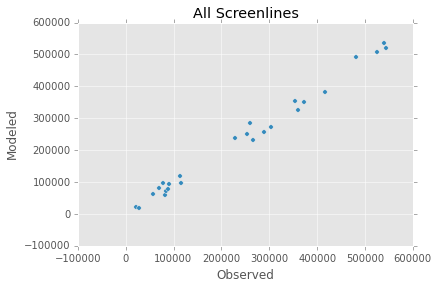

In [37]:
r_sq = r_squared(df['Volumes'],df[str(base_yr)])
ax = df[['Volumes',str(base_yr)]].plot(x='Volumes', y=str(base_yr), kind='scatter', title='All Screenlines')
ax.set_xlabel('Observed'); ax.set_ylabel('Modeled')
print ""
print " "*30 + "R-squared: " + str(r_sq.round(2))

# Transit

In [86]:
# Currently only showing 
net_sum_scen = pd.read_excel(r'outputs\network_summary_detailed.xlsx', 
                        sheetname ='Transit Summaries')

In [88]:
# Add agency name labels
agency_names = {
    1: 'King County Metro',
    2: 'Pierce Transit',
    3: 'Community Transit',
    4: 'Kitsap Transit',
    5: 'WA Ferries',
    6: 'Sound Transit',
    7: 'Everett Transit'
}

net_sum_scen['agency'] = [agency_names[net_sum_scen['agency'].iloc[i]] for i in xrange(len(net_sum_scen))]

In [89]:
pd.options.display.float_format = '{:,.0f}'.format

In [90]:
df = pd.DataFrame(net_sum_scen.groupby('agency').sum()['board'])
df.columns = ['Daily Boardings']

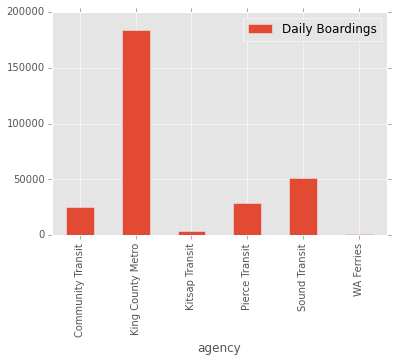

In [91]:
df.plot(kind='bar')

In [119]:
# Boadings by TOD
df = pd.pivot_table(net_sum_scen, index='tod', columns='agency', 
               aggfunc='sum', values='board')

# Sort the TOD index

# Get sorted lists for begin and end of time periods
sorted_begin = sorted([int(tod.split('to')[0]) for tod in df.index])
sorted_end = sorted([int(tod.split('to')[-1]) for tod in df.index])

df.index = [str(sorted_begin[i])+'to'+str(sorted_end[i]) for i in xrange(len(sorted_begin))]
df

agency,Community Transit,King County Metro,Kitsap Transit,Pierce Transit,Sound Transit,WA Ferries
6to7,"8,240","71,281","1,318","10,965","19,332",385
7to8,"2,569","21,229",380,"3,226","6,125",132
8to9,"4,684","25,045",751,"4,056","7,771",205
9to10,"4,650","29,045",852,"4,546","8,266",182
10to14,"3,089","21,610",574,"3,280","5,493",136
14to15,"1,812","16,051",333,"2,608","4,608",95


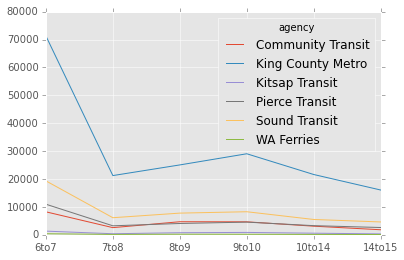

In [120]:
df.plot()